<h2>Data Science Architecture</h2>

<img src='images/Ds_Architecture.png'/img >

<h3>What is NLP</h3>

<b>Natural Language Processing</b> is the ability of the computers to analyze understand and generate human language, including sppech.  The Next stage of NLP is Natural Language interaction, which enables people to communicate with computers using normal, everyday language to complete tasks.

<b>The Data For NLP is in Different form</b>
1. text from social media posts
2. tex from webpages
3. Medical prescription
4. Voice from Audio clips

<b>Conversational Agents</b>

Computers are able to have a conversation with humans. such as like chatbots, For ex
1. cortana
2. siri
3. alexa

<h3>NLP Libraries</h3>

The most famous libraries in NLP for python includes
1. NLTK - Natural Language Tool Kit
2. Sciket Learn library NLP related features

NLTK comes with 50 collections of large and well-structured text datasets, which are called copra in NLP. Some NLTK copra's are
1. Web text corpus
2. Twitter Samples
3. Shakespear corpus samples
4. Sentiment polarity
5. Names Corpus
6. Wordnet
7. Reuters

http://www.nltk.org/howto/corpus.html

<h3>NLTK Installation</h3>

In [1]:
import nltk

#First time installation download manually from below command
#nltk.download()

In [2]:
from nltk.corpus import names

In [3]:
print(names.words()[:5])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi']


In [5]:
print(len(names.words()))

7944


NLTK is responsible for conquering many NLP and text analysis tasks

1. Tokenization
2. Pos Tagging
3. Named Entity Recognition
4. Stemming and lemmatization

<b>Tokenization</b>

Tokenization is the task of breaking into fragments seperated with whitespaces. Meanwhile certain characters are usually removed, such as punctuations, digits, emoticons. These fragments are the so called tokens.

<ul>Token Composed of One word called <b>unigrams</b></ul>
<ul>Token Composed of two consecutive words called <b>bigrams</b></ul>
<ul>Token Composed of three consecutive words called <b>trigrams</b></ul>
<ul>Token Composed of n-number consecutive words called <b>ngrams</b></ul>
    

<img src='images/tokens.png' /img>

<b>POS Tagging</b>

POS tagging is the parts of speach tagging that combines the multiple NLTK taggers to customize the tagging process. Behind the scene it is actually a pre-built machine learning model

<b>Named entities recognition</b>

To identify words or phrases that are definitive categories, such as names of a person, companies and location. 

<b>Stemming and Lemmatization</b>

Stemming is the process of reverting a derived words to its root form. There are three built in stemmers are there

1. PorterStemmer
2. LancasterStemmer
3. Snowball stemmer

In [3]:
from nltk import PorterStemmer
porter_stemmer = PorterStemmer()

print(porter_stemmer.stem('machine'))
print(porter_stemmer.stem('learning'))

machin
learn


<b>WordNet lemmatizer</b>

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun

In [4]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('machines'))
print(lemmatizer.lemmatize('learn'))

machine
learn


<h3>Product Segmentation</h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

In [4]:
path = '/Users/afnity_computer/Desktop/AI_teaching/datasets/'
df_ecom = pd.read_csv(path + 'cluster_data.csv', encoding="ISO-8859-1" )

In [5]:
df_ecom.shape

(541909, 8)

In [6]:
df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<h3>Handling Missing Values</h3>

In [7]:
df_ecom.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

While looking at the number of null values in the dataframe, it is interesting to note that  ∼
 25% of the entries are not assigned to a particular customer. With the data available, it is impossible to impute values for the user and these entries are thus useless for the current exercise. So I delete them from the dataframe:

In [8]:
df_des_null = df_ecom[df_ecom['Description'].isnull()]
df_des_null.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1454
Country           0
dtype: int64

In the above Anlysis we observed that missing description doesn't have any Customer Information. It is dificult to implement customer segmentation without customer information, so we can drop all the missing values from the dataset

<h3>Droping Missing Values</h3>

In [9]:
df_ecom = df_ecom.dropna()

In [10]:
df_ecom.shape

(406829, 8)

In [11]:
df_ecom.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

OK, therefore, by removing these entries we end up with a dataframe filled at 100% for all variables! Finally, I check for duplicate entries and delete them:

<h3>Removing Duplicates</h3>

In [12]:
df_ecom.duplicated().sum()

5225

In [13]:
df_ecom.drop_duplicates(inplace=True)

In [14]:
df_ecom.duplicated().sum()

0

In [15]:
df_ecom.shape

(401604, 8)

<h3>Exploring the Content of Variables</h3>

This dataframe contains 8 variables that correspond to:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each<br>
transaction. If this code starts with letter 'c', it indicates a cancellation.<br> 
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.<br> 
Description: Product (item) name. Nominal.<br> 
Quantity: The quantities of each product (item) per transaction. Numeric.<br>
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.<br> 
UnitPrice: Unit price. Numeric, Product price per unit in sterling.<br> 
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.<br> 
Country: Country name. Nominal, the name of the country where each customer resides.<br>

<h3>Insight Product Categories</h3>

In [16]:
df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
from sklearn.feature_extraction.text import CountVectorizer


df_ecom = df_ecom[:20000]
cat_desc = df_ecom["Description"]
cat_desc = list(cat_desc)

print(cat_desc[:5])

['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.']


Convert a collection of text documents to a matrix of token counts. 

In [18]:
#Most popular words in the datasets
cv = CountVectorizer(stop_words="english",  analyzer='word', \
                     lowercase=True, max_features=500)
transformed = cv.fit_transform(cat_desc)
print(cv.get_feature_names()[:20])

['10', '12', '15cm', '20', '24', '36', '3d', '50', '60', '72', 'acrylic', 'aged', 'aid', 'airline', 'alarm', 'alphabet', 'angel', 'angels', 'animals', 'ant']


Lets clean the dataset by dropping numbers, stopwords

<h3>Cleaning the description with NLP</h3>

In [19]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

def letters_only(astr):
    return astr.isalpha()

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

clean_text = []


for desc in cat_desc:
    #join the output with the space
    clean_text.append(' '.join([
        lemmatizer.lemmatize(word.lower())
        for word in desc.split()
        if letters_only(word) and word not in all_names]))


CountVectorizer converts a collection of Text Documents to a Token of Matrix. The Implementation produces a spares representation of the counts by using sparse_matrix. 

Converting a text document into a token of words can be called as Bag of Words

<b>Bag of Words</b>
The bag-of-words model is a simplifying representation used in natural language processing and information retrieval. Also known as the vector space model. In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity

<img src='images/bag_words.png' /img width=600>

In [20]:
#applying the Counter vectorizer parameter
cv = CountVectorizer(stop_words="english",  \
                     lowercase=True, max_features=500)
transformed = cv.fit_transform(clean_text)

cv_features = cv.get_feature_names()
print(cv.get_feature_names()[:20])

['acrylic', 'aged', 'aid', 'airline', 'alarm', 'alphabet', 'angel', 'animal', 'ant', 'antique', 'apple', 'apron', 'area', 'art', 'assorted', 'asstd', 'babushka', 'bag', 'bakelike', 'baking']


In [22]:
#sparse matris
print(transformed.shape)
print(transformed[:3])

(20000, 500)
  (0, 221)	1
  (0, 217)	1
  (0, 213)	1
  (0, 484)	1
  (1, 255)	1
  (1, 281)	1
  (1, 484)	1
  (2, 212)	1
  (2, 97)	1
  (2, 116)	1
  (2, 112)	1
  (2, 217)	1


In [23]:
print(cv.vocabulary_)

{'plaster': 335, 'tonic': 460, 'mini': 283, 'yellow': 498, 'chocolatecandle': 85, 'assorted': 14, 'record': 358, 'storage': 426, 'basket': 25, 'bath': 26, 'fairy': 158, 'paper': 311, 'tv': 472, 'butterfly': 56, 'milk': 282, 'dish': 132, 'slate': 402, 'union': 474, 'cook': 104, 'gin': 196, 'home': 224, 'save': 377, 'purse': 353, 'mirror': 285, 'poorly': 341, 'saucer': 376, 'scandinavian': 379, 'family': 159, 'strongman': 431, 'traditional': 464, 'helicopter': 218, 'airline': 3, 'writing': 497, 'girl': 199, 'bowl': 44, 'bird': 33, 'plant': 334, 'duck': 146, 'billboard': 31, 'apron': 11, 'fashion': 161, 'campagne': 63, 'making': 274, 'bunny': 53, 'snack': 405, 'flannel': 168, 'tray': 466, 'dot': 141, 'roll': 369, 'mouse': 290, 'feltcraft': 164, 'christmas': 87, 'wood': 489, 'metal': 281, 'trinket': 469, 'angel': 6, 'block': 38, 'kid': 246, 'wire': 488, 'clear': 93, 'dove': 142, 'magnet': 272, 'notebook': 298, 'chilli': 83, 'alarm': 4, 'piggy': 329, 'star': 422, 'lady': 254, 'slipper': 403

<h3>Data Preprocessing with Feature Scaling</h3>

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data 

Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

<img src='images/pca_scaling.png' /img width=500 >

In [24]:
from sklearn.preprocessing import scale

transformed = scale(transformed, with_mean=False)

/Users/afnity_computer/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Now we scaled sparse matrix by using scaling procedure

<h3>Dimensionality Reduction through PCA</h3>

<h3>PCA-Principal Component Analysis</h3>

In order ensure these clusters are truly distingushed we can look at their composition. Given the large number of variables lets implement the PCA

In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set. It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible. With fewer variables, visualization also becomes much more meaningful. PCA is more useful when dealing with 3 or higher dimensional data.

It is always performed on a symmetric correlation or covariance matrix. This means the matrix should be numeric and have standardized data.

<img src=images/pca.png /img width=600>

<h3>What are Principal Components</h3>

A principal component is a normalized linear combination of the original predictors in a data set. In image above, PC1 and PC2 are the principal components. Let’s say we have a set of predictors as X¹, X²...,Xp

The principal component can be written as:

Z¹ = Φ¹¹X¹ + Φ²¹X² + Φ³¹X³ + .... +Φp¹Xp

<h3>Why is normalization of variables necessary ?</h3>


The principal components are supplied with normalized version of original predictors. This is because, the original predictors may have different scales. For example: Imagine a data set with variables’ measuring units as gallons, kilometers, light years etc. It is definite that the scale of variances in these variables will be large.

<img src='images/pca_norm.png' /img width=500>

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

To know more about Dimensionality reduction watch this video

https://www.youtube.com/watch?v=yLdOS6xyM_Q

In [25]:
#PCA Doesn't support On Spare Matrix
#So we are importing TruncatedSVD for dimensionality reduction on behalf PCA
from sklearn.decomposition import TruncatedSVD, pca

#selected the no.of components randomly
svd = TruncatedSVD(n_components=50)

#training the model
svd.fit(transformed)
svd_samples = svd.transform(transformed)

In [26]:
#checking the dimensionality reducting from
#500 Dimensions to 50 components
print('Original number of features:', transformed.shape[1])
print('Reduced number of features:', svd_samples.shape[1])

Original number of features: 500
Reduced number of features: 50


In [38]:
sv_variance = svd.explained_variance_ratio_

sv_variance[0:50].sum()

0.25858904622283518

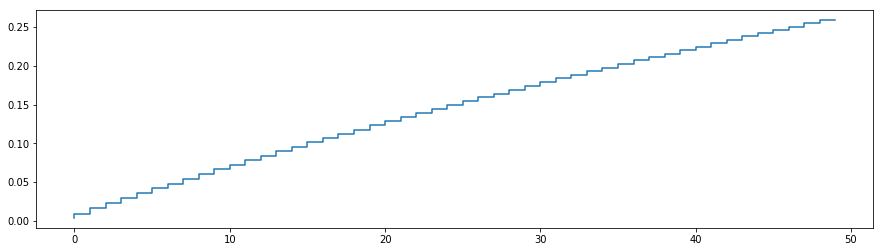

In [39]:
fig, ax = plt.subplots(figsize=(15, 4))
#sns.set(font_scale=1)
plt.step(range(svd_samples.shape[1]), svd.explained_variance_ratio_.cumsum(), \
        label='cumulative explained variance')
plt.show()

50 Components are showing 25% of oocurance, So to get the optimal variance we need to run this model with 200 components. So i thoght increasing the dimensionality upto 200 might create noise. So I settled for 50 Components

<h3>Clustering</h3>

Clustering is the task of dividing the popualation data or data points into a number of groups such that data points in the same group are more similar to other data points in the same group than those in other groups. Clustering usually optimize by maximizing the distance among clusters and minimizing the distance between objects in a cluster. 

<h3>Types Of Clustering</h3>

<b>Partitioning:</b> Group data into given number of clusters while optimizing for the objective. (e.g, distance). 

<b>Hierarchial Clustering</b> Groups data into Hierarchy of clusters. These Hierarchies are formed top-down or bottom up

<h3>Types of Clustering Algorithms</h3>

<b>Connectivity models</b> As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants

<b>Centroid Models</b> These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.

<img src='images/clust_type.png' /img width=400>

<b>Distribution Models</b> These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.

<b>Density Models</b> hese models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.



<img src='images/dist_model.png'/img width=400>

<h3>Distance Measure</h3>

component of a clustering algorithm is the distance measure which is used to find the similarity between data objects. K-means is one of the most popular and widespread partitioning clustering algorithms due to its superior scalability and efficiency. Typically, the K-means algorithm determines the distance between an object and its cluster centroid by <b>Euclidean distance measure</b>

Euclidean distance is the distance measure for the continious/numerical data

For the Text Analysis Euclidean Distance is not the best fit. Cosine similarity is the best method to find the distance graph between text elements to find the similarity between two measurment

#Watch this video to understand euclidean distance and cosine similarity

https://www.youtube.com/watch?v=yLdOS6xyM_Q


<h3>K Means Clustering</h3>

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)

<img src='images/kmeans.png' /img width=500>

<h3>Hierarchial Clustering</h3>

Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

<h3>Difference between K Means and Hierarchical clustering</h3>

Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).

In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.

K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).

K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram

<h3>Clustering Applications in Real Time</h3>

https://en.wikipedia.org/wiki/Cluster_analysis#Applications

Interms of Classification and Regression the labeled data is already available, where in this case we don't have a labels. So we have to depend on clustering algorithm to cluster the  list of words into a groups

In [28]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=9)
#fit to train your model
km.fit_transform(transformed)
#predicting for the target clusters
clusters = km.predict(transformed)
print(clusters)

[5 5 5 ..., 5 4 5]


In [29]:
#Check for the labels
km.labels_

array([5, 5, 5, ..., 5, 4, 5], dtype=int32)

In [30]:
#To checkout column indices assigned to labels
cluster_output = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}
cluster_output

{0: array([    3,    61,    78,    82,   229,   230,   231,   239,   258,
          269,   275,   291,   310,   311,   312,   313,   314,   318,
          379,   384,   428,   443,   445,   484,   485,   536,   561,
          659,   660,   677,   678,   679,   685,   687,   688,   689,
          691,   692,   693,   756,   757,   900,   902,   935,  1048,
         1055,  1082,  1092,  1225,  1282,  1287,  1295,  1363,  1364,
         1365,  1425,  1426,  1429,  1446,  1485,  1486,  1487,  1493,
         1494,  1495,  1496,  1497,  1498,  1499,  1510,  1607,  1612,
         1670,  1671,  1744,  1745,  1768,  1769,  1770,  1771,  1798,
         1823,  1824,  1871,  1872,  1881,  1941,  1954,  1979,  1991,
         1992,  2020,  2033,  2034,  2052,  2078,  2253,  2271,  2283,
         2284,  2285,  2286,  2287,  2348,  2349,  2412,  2413,  2414,
         2415,  2416,  2480,  2481,  2511,  2512,  2513,  2617,  2632,
         2677,  2892,  2963,  2984,  3077,  3160,  3267,  3286,  3308,
   

In [40]:
#centers of the label clusters
km.cluster_centers_

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         4.05240783,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.63517665]])

In [41]:
#converting cluster into a series

cluster_series = pd.Series(clusters)
print(cluster_series[:5])
print(len(cluster_series))

0    5
1    5
2    5
3    0
4    5
dtype: int32
20000


In [42]:
#lets concatenate all these labels to our dataset
#The unique key  between both the 
df_ecom['cluster'] = cluster_series
df_ecom.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,5.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,5.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,5.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,5.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,5.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,5.0
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,5.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,5.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,5.0


<h3>Word Cloud</h3>

A Wordcloud (or Tag cloud) is a visual representation of text data. It displays a list of words, the importance of each beeing shown with font size or color. This format is useful for quickly perceiving the most prominent terms

In [55]:
cluster_cloud = df_ecom[['Description', 'cluster']]

In [56]:
cluster_cloud.isnull().sum()

Description       0
cluster        6967
dtype: int64

In [57]:
cluster_cloud = cluster_cloud.dropna(axis=0, how='any')
cluster_cloud.isnull().sum()

Description    0
cluster        0
dtype: int64

In [58]:
cluster_cloud.shape

(13033, 2)

By Converting dataframe into numpy array, we will have the flexibility to iterate over the elements and to apply loops

In [59]:
cluster_cloud_list = np.array(cluster_cloud)
print(cluster_cloud_list)
print(len(cluster_cloud_list))

[['WHITE HANGING HEART T-LIGHT HOLDER' 5.0]
 ['WHITE METAL LANTERN' 5.0]
 ['CREAM CUPID HEARTS COAT HANGER' 5.0]
 ..., 
 ['ALARM CLOCK BAKELIKE CHOCOLATE' 5.0]
 ['CHRISTMAS LIGHTS 10 SANTAS ' 5.0]
 ['CHILLI LIGHTS' 4.0]]
13033


In [60]:
word_test = []
def label_description(labels):
    #default dict to handle empty values
    from collections import defaultdict
    label_index = defaultdict(list)
    for x, y in labels:
        #splitting the sentence
        for x_word in x.split():
            #converting words into lowercase
            x_word = x_word.lower()
            #checking the word in feature selection
            if x_word in cv_features:
                if x_word not in label_index:
                #print(x_word)
                #appending the word in label_index dictionary
                #with key
                    label_index[y].append(x_word)
    return label_index

label_index = label_description(cluster_cloud_list)

In [61]:
#The total number of words in every cluster
for i in range(0,9):
    print(len(label_index[i]))

1985
93
587
171
2048
37564
515
90
132


In [50]:
#list of 5 words in cluster_1(Index is zero)
print(label_index[0][:5])

['knitted', 'union', 'flag', 'hot', 'water']


In [62]:
#importing the worcloud and STOPWORD
from wordcloud import WordCloud, STOPWORDS

In [69]:
def wordcloud_object(text):
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          # set or space-separated string
                          stopwords = STOPWORDS,
                          background_color = 'white',
                          ).generate(text)
    return wordcloud

In [76]:
clusters = 9
def plot_word_cloud(clusters):
    #setting the fig size
    fig = plt.figure(figsize=(15,20))
    #iterating the loop for 9 times
    #to draw 9 wordclouds
    for cluster in range(clusters):
        #joining words in a string
        word_cloud = ' '.join(label_index[cluster])
        #subplot with 5, 2
        fig = plt.subplot(5, 2, cluster+1)
        #calling the wordcloud_object function
        w_cloud = wordcloud_object(word_cloud)
        plt.imshow(w_cloud)
        plt.title('Cluster: %d' %(cluster+1))
        
        plt.axis("off")
    plt.show()
        
        
        
        

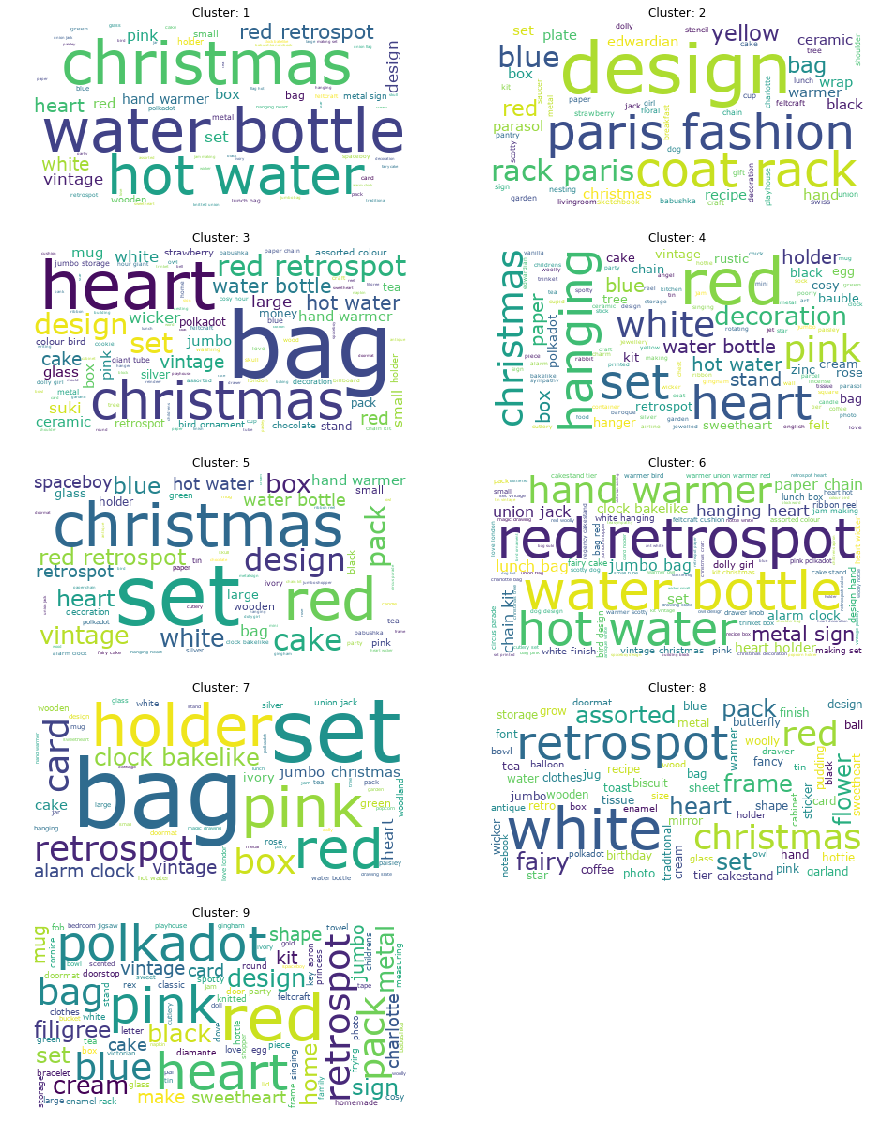

In [77]:
#calling the function
plot_word_cloud(clusters)

From this representation we can see that for example one of the cluster contains objects that could be associated with water bottle, hot water for the christamas season and the second cluster associated with the high frequency of fashion items

<h3>Summary</h3>

Our objective is to categorize the product description based on similar products into a clusters<br>
Hence it is a text based data so to clean this entire data we applied NLP for Data Wrangling or Data Mugging. 
Clustering is the Un-Supervised Machine Learning Algorithm<br>
K-Means is one of the best algorith to handle clustering<br>
Here K refers a number of clusters to choose<br>
You have the flexibility to choose Random Number of Clusters and Iterate over the different clusters to find the clusters with better variation<br>
Gausian mixture model, Baysean Gaussian mixture models are other algorithms to choose optimal models<br>
We implemented the PCA to handle the high Dimensionality, prior that we applied scaling on spares matrix<br>
Finally Once the clusters are formed we used the wordcloud to check high frequency of words occured in the cluster